In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [2]:
font_files = font_manager.findSystemFonts()
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\pcn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  


In [3]:
df = pd.read_csv('./DTS001001/10_임산물월별품목별평균가격.csv')

In [4]:
df.head()

,DATA_STNDD_DT,FOPRD_GOODS_PRLST_CD,FOPRD_PRLST_NM,PRLST_DTL_NM,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD,FOPRD_GRAD_NM,DATA_QUALT_MNGME_YN,DATA_OPNNG_YN
0,2008-07,5501010010,밤,밤/국산,4000.0,55,3,보통,Y,Y
1,2008-07,5501010010,밤,밤/국산,4300.0,55,2,상,Y,Y
2,2008-07,5501010010,밤,밤/국산,3000.0,55,3,보통,Y,Y
3,2008-07,5501020210,깐잣,깐잣/국산,71000.0,55,2,상,Y,Y
4,2008-07,5501020210,깐잣,깐잣/국산,49000.0,55,3,보통,Y,Y


In [5]:
nm_count = df.groupby('FOPRD_PRLST_NM').count()

In [6]:
nm_count.head()

,DATA_STNDD_DT,FOPRD_GOODS_PRLST_CD,PRLST_DTL_NM,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD,FOPRD_GRAD_NM,DATA_QUALT_MNGME_YN,DATA_OPNNG_YN
FOPRD_PRLST_NM,,,,,,,,,
감초,13,13,13,13,13,13,13,13,13
건고사리,3,3,3,3,3,3,3,3,3
건곤드레,21,21,21,21,21,21,21,21,21
건대추,1519,1519,1519,1519,1519,1519,1519,1519,1519
건산수유,28,28,28,28,28,28,28,28,28


In [7]:
nm_count= nm_count.sort_values(by='DATA_STNDD_DT', ascending=False)
top10_nm = nm_count[:10]

In [8]:
top10_nm

,DATA_STNDD_DT,FOPRD_GOODS_PRLST_CD,PRLST_DTL_NM,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD,FOPRD_GRAD_NM,DATA_QUALT_MNGME_YN,DATA_OPNNG_YN
FOPRD_PRLST_NM,,,,,,,,,
밤,1541,1541,1541,1541,1541,1541,1541,1541,1541
건대추,1519,1519,1519,1519,1519,1519,1519,1519,1519
생표고,1020,1020,1020,1020,1020,1020,1020,1020,1020
생더덕,825,825,825,825,825,825,825,825,825
깐잣,654,654,654,654,654,654,654,654,654
피호도,624,624,624,624,624,624,624,624,624
마른고사리,614,614,614,614,614,614,614,614,614
곶감,588,588,588,588,588,588,588,588,588
건표고/동고,426,426,426,426,426,426,426,426,426


In [9]:
other = top10_nm.DATA_STNDD_DT.sum()
counts = top10_nm.DATA_STNDD_DT.tolist()
counts.append(nm_count.DATA_STNDD_DT.sum()-other)

In [10]:
names = top10_nm.index.tolist()
names.append('기타')

In [11]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

In [12]:
def plot_answer_pi(question, answers, data):
    c = [cm.tab20c(x) for x in range(len(data))]
    fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w", size="smaller"),
                                     colors=c)

    ax.legend(wedges, answers,
              title="품목명",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    for text in autotexts:
        s = text.get_text()
        s = float(s.split('%')[0])
        font_size = 8 if s < 5 else 14
        text.set_fontsize(font_size)

    ax.set_title(question, size=20)
    fig.tight_layout()
    plt.show()

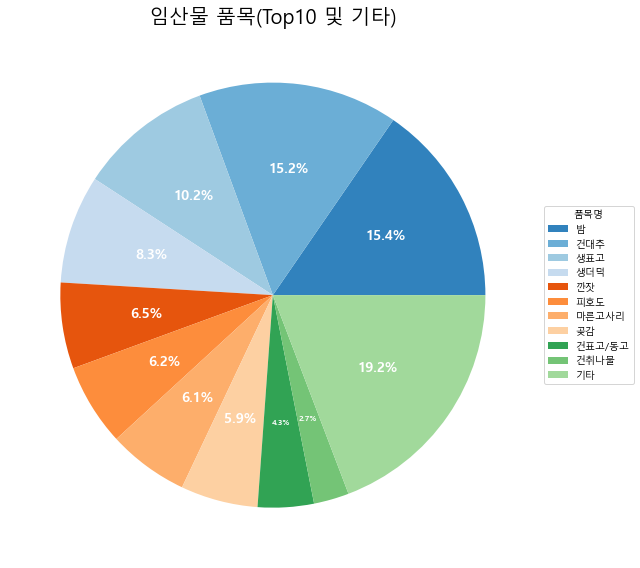

In [13]:
plot_answer_pi('임산물 품목(Top10 및 기타)', names,counts)

In [14]:
top25_nm = nm_count[10: 25]
counts = top25_nm.DATA_STNDD_DT.tolist()
counts.append(nm_count.DATA_STNDD_DT.sum()-top10_nm.DATA_STNDD_DT.sum()-top25_nm.DATA_STNDD_DT.sum())
names = top25_nm.index.tolist()
names.append('기타')

In [15]:
print(counts)
print(names)

[261, 232, 218, 171, 168, 138, 115, 74, 73, 53, 48, 46, 42, 38, 31, 213]
['피은행', '생도라지', '건표고/향고', '건오미자', '건표고/향신', '떫은감', '건표고', '홍시', '생취나물', '생오미자', '복분자', '구기자', '피호두', '마', '깐호두', '기타']


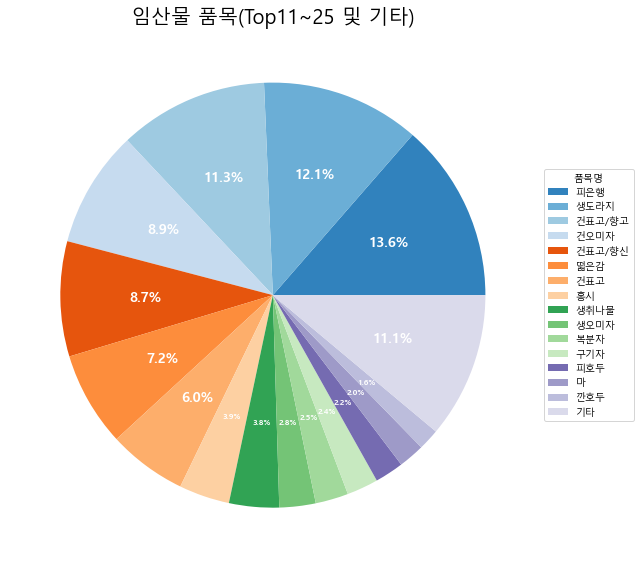

In [16]:
plot_answer_pi('임산물 품목(Top11~25 및 기타)', names,counts)

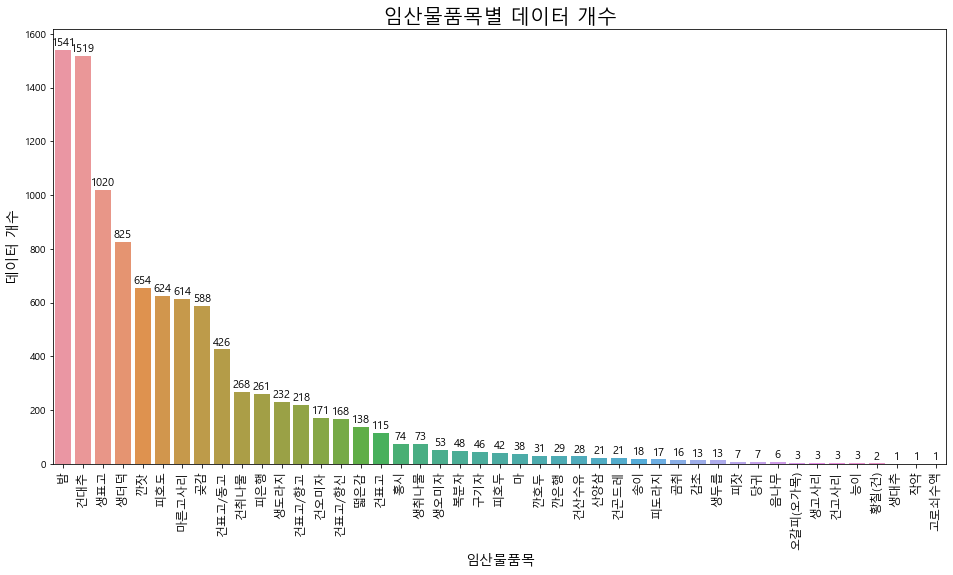

In [17]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=nm_count.index, y='DATA_STNDD_DT', data=nm_count)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_ylabel('데이터 개수', fontsize=14)
ax.set_xlabel('임산물품목', fontsize=14)
ax.set_title("임산물품목별 데이터 개수", fontsize=20)

ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)

In [18]:
chestnuts_df = df[df['FOPRD_PRLST_NM'] == '밤']
chestnuts_df.insert(1, 'YM', pd.to_datetime(chestnuts_df['DATA_STNDD_DT'], format='%Y-%m'))
chestnuts_normal_df = chestnuts_df[chestnuts_df['FOPRD_GRAD_NM'] == '보통']
chestnuts_high_df = chestnuts_df[chestnuts_df['FOPRD_GRAD_NM'] == '상']
chestnuts_df = chestnuts_df.sort_values(by='YM')
chestnuts_df = chestnuts_df.reset_index(drop=True)

In [19]:
chestnuts_normal_df = chestnuts_normal_df.sort_values(by='YM')
chestnuts_normal_df = chestnuts_normal_df.reset_index(drop=True)
chestnuts_high_df = chestnuts_high_df.sort_values(by='YM')
chestnuts_high_df = chestnuts_high_df.reset_index(drop=True)

In [20]:
chestnuts_df.head()

,DATA_STNDD_DT,YM,FOPRD_GOODS_PRLST_CD,FOPRD_PRLST_NM,PRLST_DTL_NM,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD,FOPRD_GRAD_NM,DATA_QUALT_MNGME_YN,DATA_OPNNG_YN
0,2007-03,2007-03-01,5501010010,밤,밤/국산,5500.0,55,2,상,Y,Y
1,2007-03,2007-03-01,5501010010,밤,밤/국산,4500.0,55,3,보통,Y,Y
2,2007-03,2007-03-01,5501010010,밤,밤/국산,4500.0,55,3,보통,Y,Y
3,2007-03,2007-03-01,5501010010,밤,밤/국산,3500.0,55,3,보통,Y,Y
4,2007-03,2007-03-01,5501010010,밤,밤/국산,5500.0,55,2,상,Y,Y


In [21]:
chestnuts_month_mean_df = chestnuts_df.groupby("YM").mean()
chestnuts_normal_df = chestnuts_normal_df.groupby("YM").mean()
chestnuts_high_df = chestnuts_high_df.groupby("YM").mean()

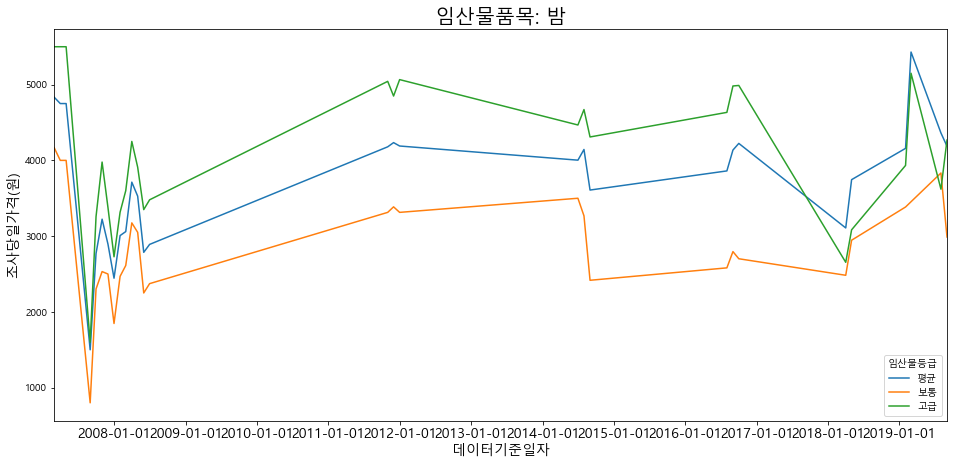

In [22]:
ax = chestnuts_month_mean_df.plot(y='EXMNN_TODAY_PRICE', label='평균', figsize=(16, 8),
                                 title="임산물품목-밤")
chestnuts_normal_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='보통')
chestnuts_high_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='고급')
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 밤", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

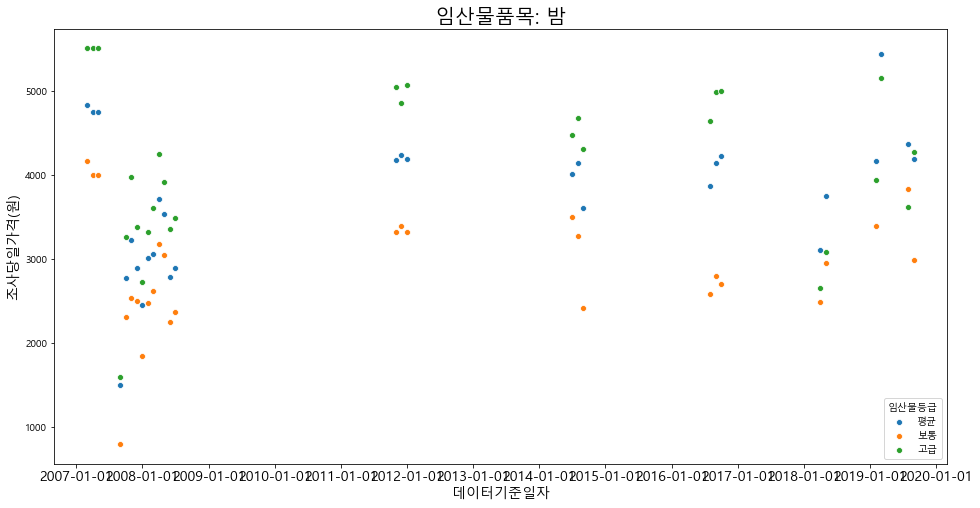

In [23]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=chestnuts_month_mean_df.index, y='EXMNN_TODAY_PRICE', data=chestnuts_month_mean_df, label='평균')
sns.scatterplot(x=chestnuts_normal_df.index, y='EXMNN_TODAY_PRICE', data=chestnuts_normal_df, label='보통')
sns.scatterplot(x=chestnuts_high_df.index, y='EXMNN_TODAY_PRICE', data=chestnuts_high_df, label='고급')
ax.set(xlim=(chestnuts_month_mean_df.index[0]-pd.DateOffset(months=6), chestnuts_month_mean_df.index[-1]+pd.DateOffset(months=6)))
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 밤", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

In [24]:
jujube_df = df[df['FOPRD_PRLST_NM'] == '건대추']
jujube_df.insert(1, 'YM', pd.to_datetime(jujube_df['DATA_STNDD_DT'], format='%Y-%m'))

In [25]:
jujube_normal_df = jujube_df[jujube_df['FOPRD_GRAD_NM'] == '보통']
jujube_high_df = jujube_df[jujube_df['FOPRD_GRAD_NM'] == '상']

In [26]:
jujube_df = jujube_df.sort_values(by='YM')
jujube_df = jujube_df.reset_index(drop=True)

In [27]:
jujube_normal_df = jujube_normal_df.sort_values(by='YM')
jujube_normal_df = jujube_normal_df.reset_index(drop=True)
jujube_high_df = jujube_high_df.sort_values(by='YM')
jujube_high_df = jujube_high_df.reset_index(drop=True)

In [28]:
jujube_month_mean_df = jujube_df.groupby("YM").mean()
jujube_normal_df = jujube_normal_df.groupby("YM").mean()
jujube_high_df = jujube_high_df.groupby("YM").mean()

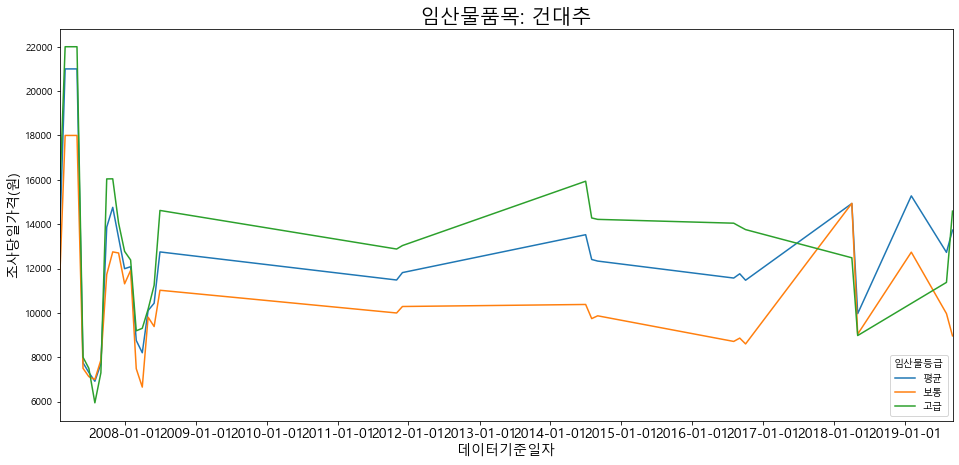

In [29]:
ax = jujube_month_mean_df.plot(y='EXMNN_TODAY_PRICE', label='평균', figsize=(16, 8))
jujube_normal_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='보통')
jujube_high_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='고급')
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 건대추", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

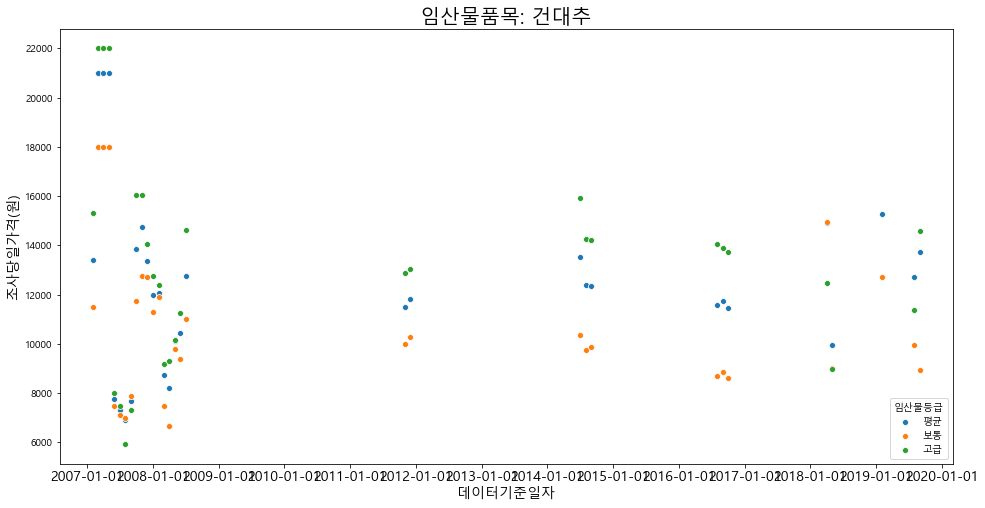

In [30]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=jujube_month_mean_df.index, y='EXMNN_TODAY_PRICE', data=jujube_month_mean_df, label='평균')
sns.scatterplot(x=jujube_normal_df.index, y='EXMNN_TODAY_PRICE', data=jujube_normal_df, label='보통')
sns.scatterplot(x=jujube_high_df.index, y='EXMNN_TODAY_PRICE', data=jujube_high_df, label='고급')
ax.set(xlim=(jujube_month_mean_df.index[0]-pd.DateOffset(months=6), jujube_month_mean_df.index[-1]+pd.DateOffset(months=6)))
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 건대추", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

In [31]:
mushroom_df = df[df['FOPRD_PRLST_NM'] == '생표고']
mushroom_df.insert(1, 'YM', pd.to_datetime(mushroom_df['DATA_STNDD_DT'], format='%Y-%m'))

mushroom_normal_df = mushroom_df[mushroom_df['FOPRD_GRAD_NM'] == '보통']
mushroom_high_df = mushroom_df[mushroom_df['FOPRD_GRAD_NM'] == '상']

mushroom_df = mushroom_df.sort_values(by='YM')
mushroom_df = mushroom_df.reset_index(drop=True)

mushroom_normal_df = mushroom_normal_df.sort_values(by='YM')
mushroom_normal_df = mushroom_normal_df.reset_index(drop=True)
mushroommushroom_high_df = mushroom_high_df.sort_values(by='YM')
mushroom_high_df = mushroom_high_df.reset_index(drop=True)

mushroom_month_mean_df = mushroom_df.groupby("YM").mean()
mushroom_normal_df = mushroom_normal_df.groupby("YM").mean()
mushroom_high_df = mushroom_high_df.groupby("YM").mean()

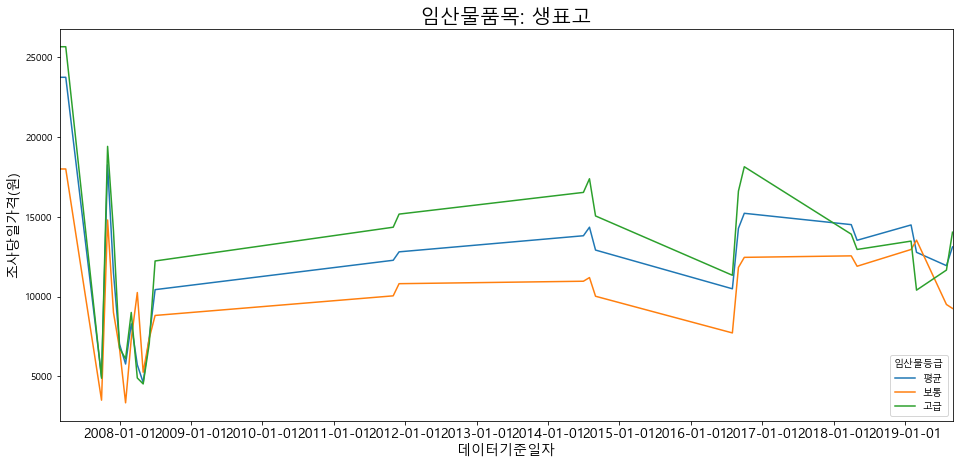

In [32]:
ax = mushroom_month_mean_df.plot(y='EXMNN_TODAY_PRICE', label='평균', figsize=(16, 8))
mushroom_normal_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='보통')
mushroom_high_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='고급')
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 생표고", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

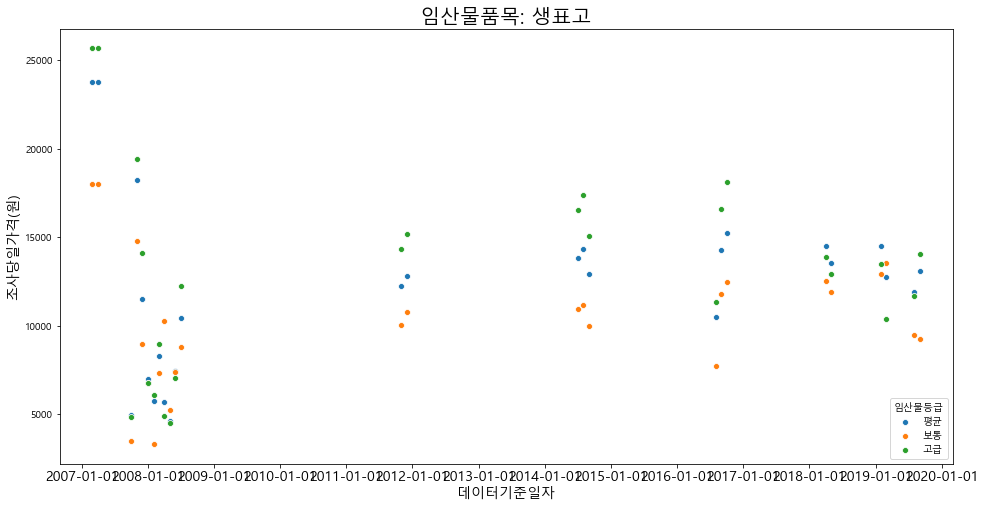

In [33]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=mushroom_month_mean_df.index, y='EXMNN_TODAY_PRICE', data=mushroom_month_mean_df, label='평균')
sns.scatterplot(x=mushroom_normal_df.index, y='EXMNN_TODAY_PRICE', data=mushroom_normal_df, label='보통')
sns.scatterplot(x=mushroom_high_df.index, y='EXMNN_TODAY_PRICE', data=mushroom_high_df, label='고급')
ax.set(xlim=(mushroom_month_mean_df.index[0]-pd.DateOffset(months=6), mushroom_month_mean_df.index[-1]+pd.DateOffset(months=6)))
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 생표고", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

In [34]:
deodeok_df = df[df['FOPRD_PRLST_NM'] == '생더덕']
deodeok_df.insert(1, 'YM', pd.to_datetime(deodeok_df['DATA_STNDD_DT'], format='%Y-%m'))

deodeok_normal_df = deodeok_df[deodeok_df['FOPRD_GRAD_NM'] == '보통']
deodeok_high_df = deodeok_df[deodeok_df['FOPRD_GRAD_NM'] == '상']

deodeok_df = deodeok_df.sort_values(by='YM')
deodeok_df = deodeok_df.reset_index(drop=True)

deodeok_normal_df = deodeok_normal_df.sort_values(by='YM')
deodeok_normal_df = deodeok_normal_df.reset_index(drop=True)
deodeok_high_df = deodeok_high_df.sort_values(by='YM')
deodeok_high_df = deodeok_high_df.reset_index(drop=True)

deodeok_month_mean_df = deodeok_df.groupby("YM").mean()
deodeok_normal_df = deodeok_normal_df.groupby("YM").mean()
deodeok_high_df = deodeok_high_df.groupby("YM").mean()

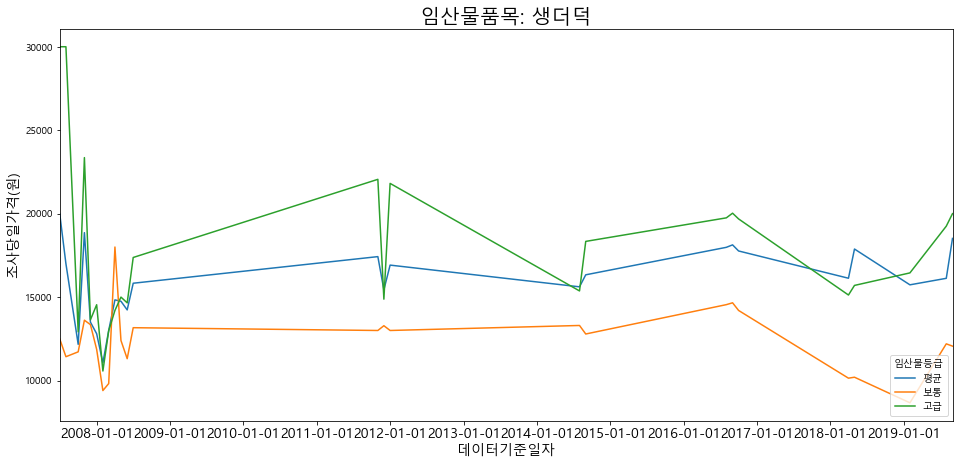

In [35]:
ax = deodeok_month_mean_df.plot(y='EXMNN_TODAY_PRICE', label='평균', figsize=(16, 8))
deodeok_normal_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='보통')
deodeok_high_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='고급')
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 생더덕", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

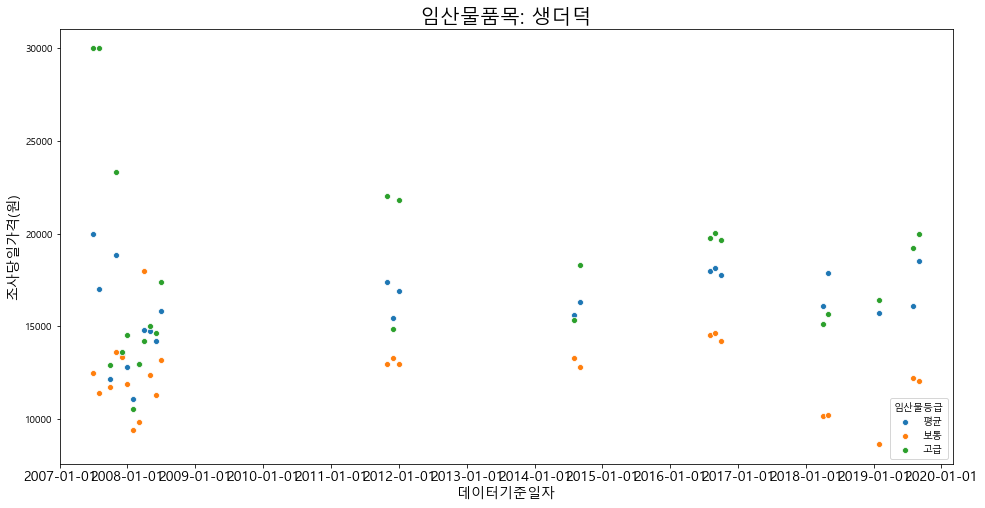

In [36]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=deodeok_month_mean_df.index, y='EXMNN_TODAY_PRICE', data=deodeok_month_mean_df, label='평균')
sns.scatterplot(x=deodeok_normal_df.index, y='EXMNN_TODAY_PRICE', data=deodeok_normal_df, label='보통')
sns.scatterplot(x=deodeok_high_df.index, y='EXMNN_TODAY_PRICE', data=deodeok_high_df, label='고급')
ax.set(xlim=(deodeok_month_mean_df.index[0]-pd.DateOffset(months=6), deodeok_month_mean_df.index[-1]+pd.DateOffset(months=6)))
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 생더덕", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

In [37]:
pine_df = df[df['FOPRD_PRLST_NM'] == '깐잣']
pine_df.insert(1, 'YM', pd.to_datetime(pine_df['DATA_STNDD_DT'], format='%Y-%m'))

pine_normal_df = pine_df[pine_df['FOPRD_GRAD_NM'] == '보통']
pine_high_df = pine_df[pine_df['FOPRD_GRAD_NM'] == '상']

pine_df = pine_df.sort_values(by='YM')
pine_df = pine_df.reset_index(drop=True)

pine_normal_df = pine_normal_df.sort_values(by='YM')
pine_normal_df = pine_normal_df.reset_index(drop=True)
pine_high_df = pine_high_df.sort_values(by='YM')
pine_high_df = pine_high_df.reset_index(drop=True)

pine_month_mean_df = pine_df.groupby("YM").mean()
pine_normal_df = pine_normal_df.groupby("YM").mean()
pine_high_df = pine_high_df.groupby("YM").mean()

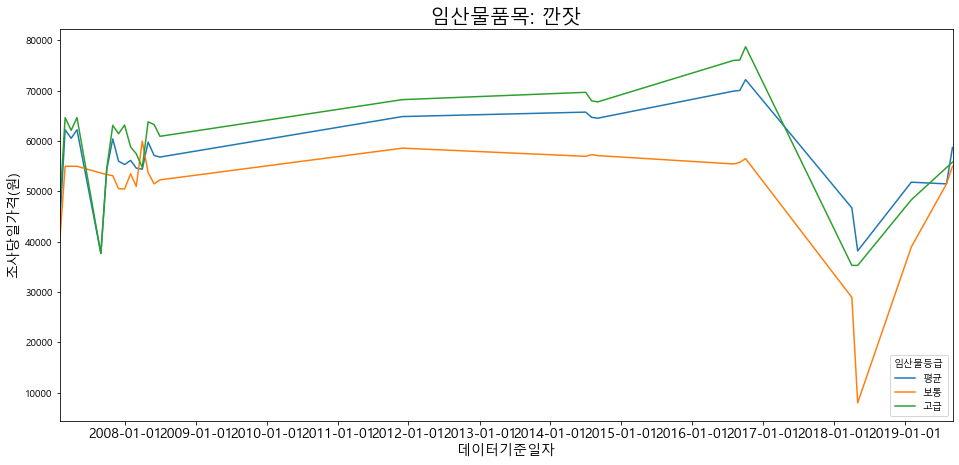

In [38]:
ax = pine_month_mean_df.plot(y='EXMNN_TODAY_PRICE', label='평균', figsize=(16, 8))
pine_normal_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='보통')
pine_high_df.plot(y='EXMNN_TODAY_PRICE', ax=ax, label='고급')
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 깐잣", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

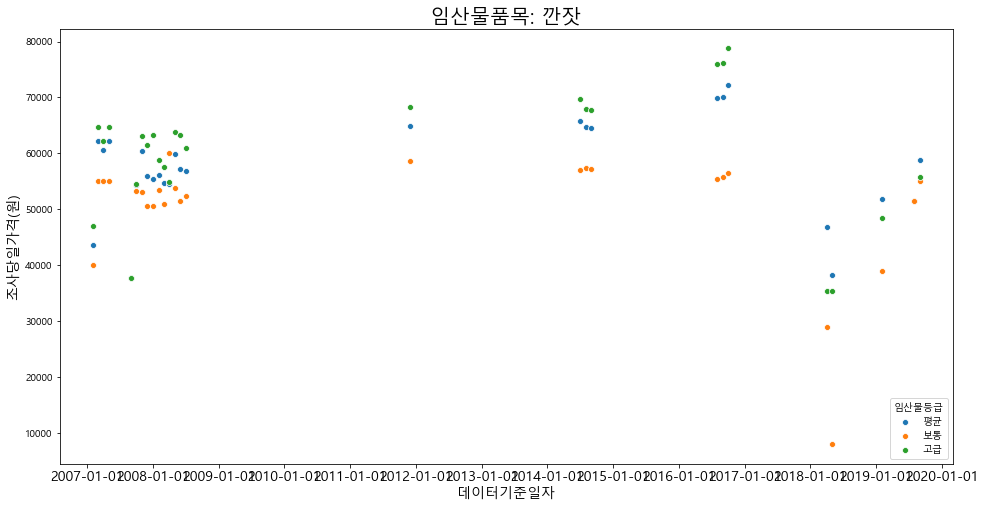

In [39]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=pine_month_mean_df.index, y='EXMNN_TODAY_PRICE', data=pine_month_mean_df, label='평균')
sns.scatterplot(x=pine_normal_df.index, y='EXMNN_TODAY_PRICE', data=pine_normal_df, label='보통')
sns.scatterplot(x=pine_high_df.index, y='EXMNN_TODAY_PRICE', data=pine_high_df, label='고급')
ax.set(xlim=(pine_month_mean_df.index[0]-pd.DateOffset(months=6), pine_month_mean_df.index[-1]+pd.DateOffset(months=6)))
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물품목: 깐잣", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.setp(ax.xaxis.get_majorticklabels(), ha="center")
ax.legend(title='임산물등급', loc='lower right')

In [40]:
item_df = df.groupby(['FOPRD_PRLST_NM', 'DATA_STNDD_DT']).mean()
item_df = item_df.reset_index()

In [41]:
item_df.insert(1, 'YM', pd.to_datetime(item_df.DATA_STNDD_DT, format='%Y-%m'))
item_df = item_df.sort_values(by=['FOPRD_PRLST_NM', 'DATA_STNDD_DT'], ascending=True)
item_df.head()

,FOPRD_PRLST_NM,YM,DATA_STNDD_DT,FOPRD_GOODS_PRLST_CD,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD
0,감초,2019-02-01,2019-02,5.504173e+09,45333.333333,55.0,3.0
1,감초,2019-09-01,2019-09,5.504176e+09,23200.000000,55.0,1.6
2,건고사리,2018-04-01,2018-04,5.503010e+09,62500.000000,55.0,2.0
3,건고사리,2018-05-01,2018-05,5.503010e+09,58000.000000,55.0,1.0
4,건곤드레,2018-05-01,2018-05,5.503110e+09,30000.000000,55.0,2.0


In [42]:
item_df = item_df.rename(columns={'FOPRD_PRLST_NM': '임산물품목명'})
time_delta = pd.DateOffset(months=6)

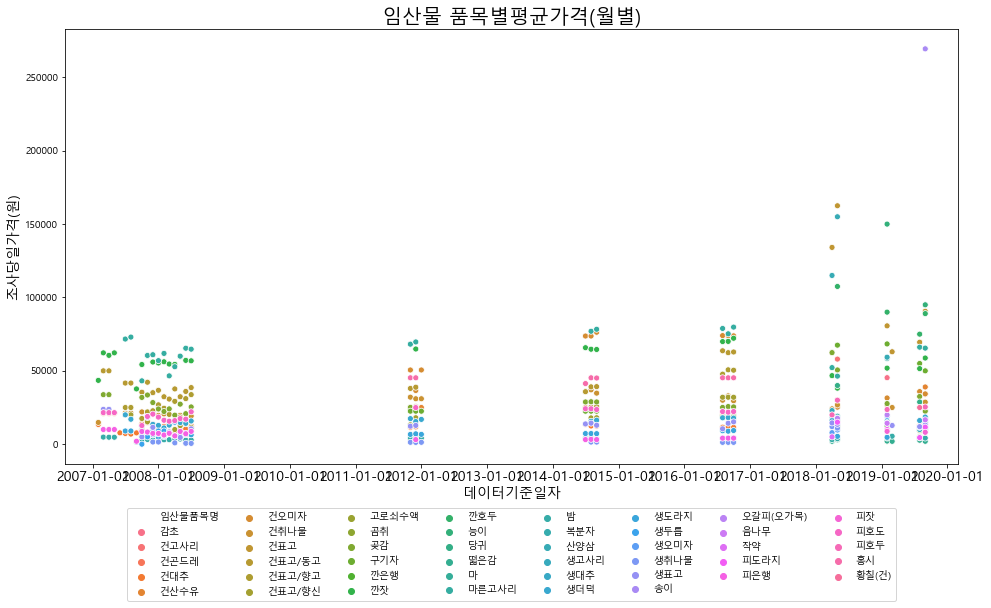

In [43]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x='YM', y='EXMNN_TODAY_PRICE', hue='임산물품목명', data=item_df)
ax.legend(loc='upper center', ncol=8, bbox_to_anchor=(0.5, -0.09))
ax.set(xlim=(item_df.YM.min()-time_delta, item_df.YM.max()+time_delta))
ax.set_ylabel('조사당일가격(원)', fontsize=14)
ax.set_xlabel('데이터기준일자', fontsize=14)
ax.set_title("임산물 품목별평균가격(월별)", fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())

In [44]:
df = pd.read_csv('./DTS001001/10_임산물월별품목별평균가격.csv')
df.head()

,DATA_STNDD_DT,FOPRD_GOODS_PRLST_CD,FOPRD_PRLST_NM,PRLST_DTL_NM,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD,FOPRD_GRAD_NM,DATA_QUALT_MNGME_YN,DATA_OPNNG_YN
0,2008-07,5501010010,밤,밤/국산,4000.0,55,3,보통,Y,Y
1,2008-07,5501010010,밤,밤/국산,4300.0,55,2,상,Y,Y
2,2008-07,5501010010,밤,밤/국산,3000.0,55,3,보통,Y,Y
3,2008-07,5501020210,깐잣,깐잣/국산,71000.0,55,2,상,Y,Y
4,2008-07,5501020210,깐잣,깐잣/국산,49000.0,55,3,보통,Y,Y


In [45]:
item_level_count = df.groupby(['FOPRD_PRLST_NM', 'FOPRD_GRAD_NM'])['FOPRD_PRLST_NM'].value_counts()
item_level_count= item_level_count.to_dict()

In [46]:
all_item = []
all_lavel = []
for key, value in item_level_count.items():
    all_item.append(key[0])
    all_lavel.append(key[1])

In [47]:
all_items = list(set(all_item))
all_levels = list(set(all_lavel))

In [48]:
all_level_items = []
for i in all_items:
    for l in all_levels:
        all_level_items.append((i, l, i))

In [49]:
all_level_count = {key: 0 for key in all_level_items}
for key, value in item_level_count.items():
    all_level_count[key] =  value

In [50]:
level_ranges = []
for i in ['보통', '상', '특']:
    lebel_range = []
    for key, value in all_level_count.items():
        if key[1] == i:
            lebel_range.append((key, value))
    lebel_range.sort(key=lambda x: x[0][0])
    level_ranges.append(lebel_range)

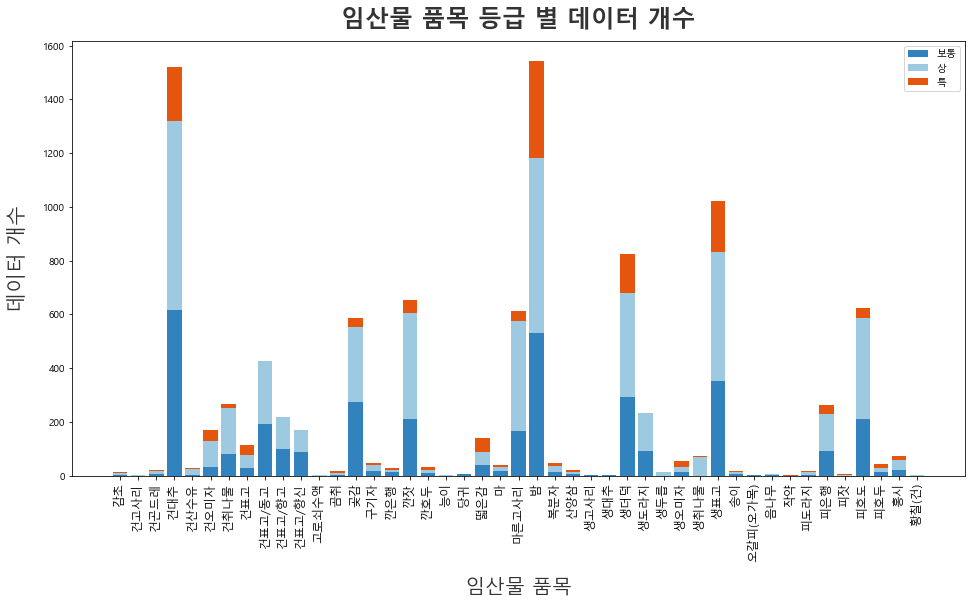

In [51]:
fig, ax = plt.subplots(figsize=(16, 8))

bottom_data = np.zeros(len(level_ranges[0]))
c = [cm.tab20c(x) for x in range(len(level_ranges)*3)]
for level_range in level_ranges:
    data = np.array([item[1] for item in level_range])
    labels = [item[0][0] for item in level_range]
#     labels = [idx for idx in labels_id]
   
    color_id=0
    if level_range[0][0][1] == '보통':
        color_id = 0
    elif level_range[0][0][1] == '상':
        color_id= 2
    elif level_range[0][0][1] == '특':
        color_id= 4
        
    ax.bar(labels, data, label=level_range[0][0][1], color=c[color_id], bottom=bottom_data)
    bottom_data += data


ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize=14)
ax.legend()


ax.set_xlabel('임산물 품목', labelpad=15, color='#333333', size=20)
ax.set_ylabel('데이터 개수', labelpad=15, color='#333333', size=20)
ax.set_title('임산물 품목 등급 별 데이터 개수', pad=15, color='#333333', weight='bold', size=24)


ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)

plt.show()

In [52]:
year_df = df.copy()
year_df.insert(1, 'Y', year_df['DATA_STNDD_DT'].map(lambda x: x.split('-')[0]))
year_df.head()

,DATA_STNDD_DT,Y,FOPRD_GOODS_PRLST_CD,FOPRD_PRLST_NM,PRLST_DTL_NM,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD,FOPRD_GRAD_NM,DATA_QUALT_MNGME_YN,DATA_OPNNG_YN
0,2008-07,2008,5501010010,밤,밤/국산,4000.0,55,3,보통,Y,Y
1,2008-07,2008,5501010010,밤,밤/국산,4300.0,55,2,상,Y,Y
2,2008-07,2008,5501010010,밤,밤/국산,3000.0,55,3,보통,Y,Y
3,2008-07,2008,5501020210,깐잣,깐잣/국산,71000.0,55,2,상,Y,Y
4,2008-07,2008,5501020210,깐잣,깐잣/국산,49000.0,55,3,보통,Y,Y


In [53]:
year_df = year_df.groupby(['FOPRD_PRLST_NM', 'Y', 'FOPRD_GRAD_NM'])['EXMNN_TODAY_PRICE'].mean()
year_dict = year_df.to_dict()

In [54]:
chestnuts = {}
for key, value in year_dict.items():
    if key[0] == '밤':
        chestnuts[key] = value

In [55]:
chestnut_data = {}
for year in range(2007, 2020):
    for level in ['보통', '상', '특']:
        q_key = ('밤', str(year), level)
        if q_key in chestnuts:
            chestnut_data[q_key] = chestnuts[q_key]
        else:
            chestnut_data[q_key] = 0

In [56]:
chestnut_df_dict = {}
year, level, price = [], [], []
for key, value in chestnut_data.items():
    year.append(key[1])
    level.append(key[2])
    price.append(value)

In [57]:
chestnut_df_dict = {'year': year, 'level': level, 'price': price}
chestnut_year_df = pd.DataFrame(chestnut_df_dict)
chestnut_year_df = chestnut_year_df.rename(columns={'level': '등급'})
chestnut_year_df.head()

,year,등급,price
0,2007,보통,2833.972603
1,2007,상,4034.492754
2,2007,특,2780.000000
3,2008,보통,2382.312925
4,2008,상,3410.333333


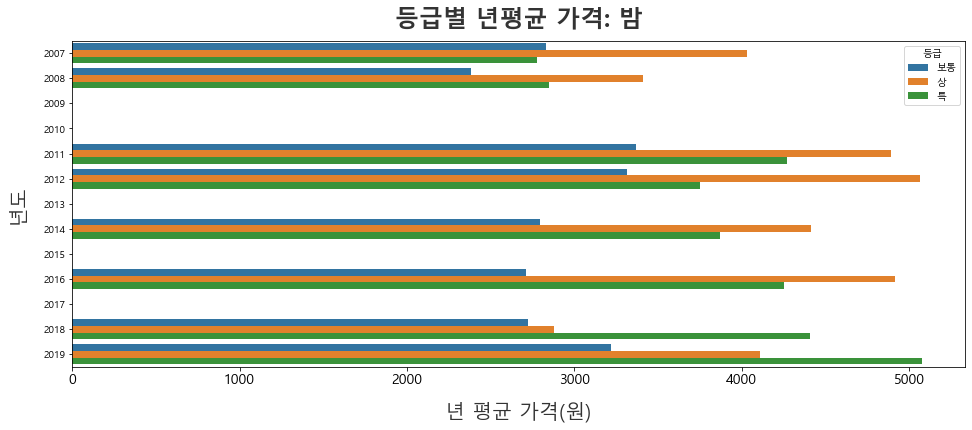

In [58]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='price', y='year', hue='등급', data=chestnut_year_df, orient='h')
ax.set_xlabel('년 평균 가격(원)', labelpad=15, color='#333333', size=20)
ax.set_ylabel('년도', labelpad=15, color='#333333', size=20)
ax.set_title('등급별 년평균 가격: 밤', pad=15, color='#333333', weight='bold', size=24)
ax.xaxis.set_tick_params(labelsize=14)

In [59]:
chestnuts = {}
for key, value in year_dict.items():
    if key[0] == '건대추':
        chestnuts[key] = value

In [60]:
chestnut_data = {}
for year in range(2007, 2020):
    for level in ['보통', '상', '특']:
        q_key = ('건대추', str(year), level)
        if q_key in chestnuts:
            chestnut_data[q_key] = chestnuts[q_key]
        else:
            chestnut_data[q_key] = 0

In [61]:
chestnut_df_dict = {}
year, level, price = [], [], []
for key, value in chestnut_data.items():
    year.append(key[1])
    level.append(key[2])
    price.append(value)

In [62]:
chestnut_df_dict = {'year': year, 'level': level, 'price': price}
chestnut_year_df = pd.DataFrame(chestnut_df_dict)
chestnut_year_df = chestnut_year_df.rename(columns={'level': '등급'})
chestnut_year_df.head()

,year,등급,price
0,2007,보통,11956.578947
1,2007,상,14861.523810
2,2007,특,9000.000000
3,2008,보통,10256.271676
4,2008,상,12509.356021


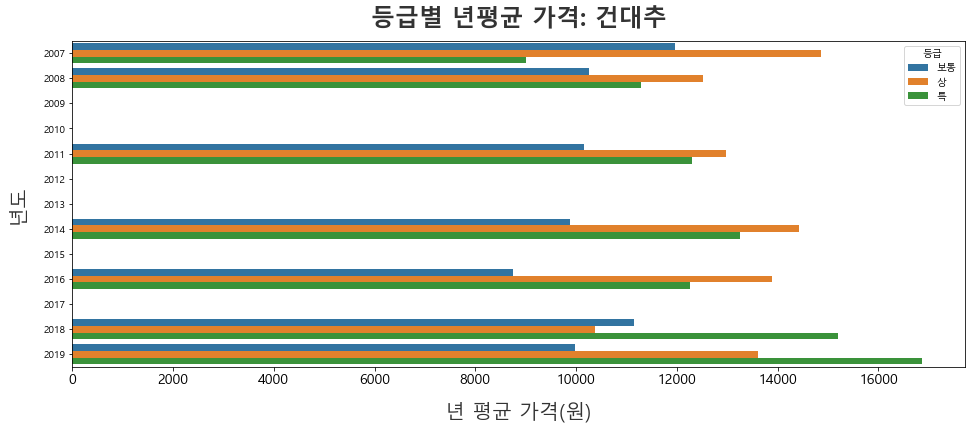

In [63]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='price', y='year', hue='등급', data=chestnut_year_df, orient='h')
ax.set_xlabel('년 평균 가격(원)', labelpad=15, color='#333333', size=20)
ax.set_ylabel('년도', labelpad=15, color='#333333', size=20)
ax.set_title('등급별 년평균 가격: 건대추', pad=15, color='#333333', weight='bold', size=24)
ax.xaxis.set_tick_params(labelsize=14)

In [64]:
level_df = df.copy()
level_df.head()

,DATA_STNDD_DT,FOPRD_GOODS_PRLST_CD,FOPRD_PRLST_NM,PRLST_DTL_NM,EXMNN_TODAY_PRICE,FOPRD_DETL_TPCD,FOPRD_GRCD,FOPRD_GRAD_NM,DATA_QUALT_MNGME_YN,DATA_OPNNG_YN
0,2008-07,5501010010,밤,밤/국산,4000.0,55,3,보통,Y,Y
1,2008-07,5501010010,밤,밤/국산,4300.0,55,2,상,Y,Y
2,2008-07,5501010010,밤,밤/국산,3000.0,55,3,보통,Y,Y
3,2008-07,5501020210,깐잣,깐잣/국산,71000.0,55,2,상,Y,Y
4,2008-07,5501020210,깐잣,깐잣/국산,49000.0,55,3,보통,Y,Y


In [65]:
level_count = level_df['FOPRD_GRAD_NM'].value_counts().to_dict()

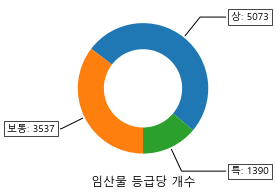

In [66]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = []
gender = []
for g, c in level_count.items():
    data.append(c)
    gender.append(g)

gender_strs = []
for d, g in zip(data, gender):
    gender_kr = '남' if g == 'M' else '여'
    gender_str = g + ": " + str(d)
    gender_strs.append(gender_str)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(gender_strs[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("임산물 등급당 개수", y=-0.1, pad=1.4)

plt.show()